# Experimental Demonstration of Quantum Tunneling of a single particle in IBM Quantum Computer : An IBM Quantum Experience.


This ipython notebook demonstrates how to simulate the quantum tunneling of a single particle in IBM Quantum Computer using the QISKit library in Python.

For more information please check out the manuscript available on (post arXiv link here)


In [55]:
import qiskit
from qiskit import *
from numpy import *
import qiskit as qk
from qiskit import QuantumCircuit, execute, BasicAer
from qiskit.visualization import plot_histogram, plot_state_city
simulator = BasicAer.get_backend('qasm_simulator')
from matplotlib import pyplot as plt
from qiskit.visualization import circuit_drawer
from qiskit.visualization import plot_state_city
import matplotlib.image as mpimg
%matplotlib inline

You will need import the python libraries 'Qiskit' and 'Numpy' to run this code. If you don't have them already installed in your system, please follow these links to help understand how to install and import these libraries. 

For installation and importing Numpy please follow the link for further help - https://numpy.org/install/

For installation and importing Qiskit please follow the link for further help - https://qiskit.org/documentation/stable/0.24/install.html

In [56]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister,QuantumRegister
from qiskit import BasicAer, execute
from math import pi
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram,plot_state_hinton

To run this code on by sending it to IBM Open Access Qauntum computer you need to first create an account https://quantum-computing.ibm.com/


Once you set up your profile you will be assigned with a token that can be found on main profile page. 
Paste the token the code below and remove the comment to run the code.

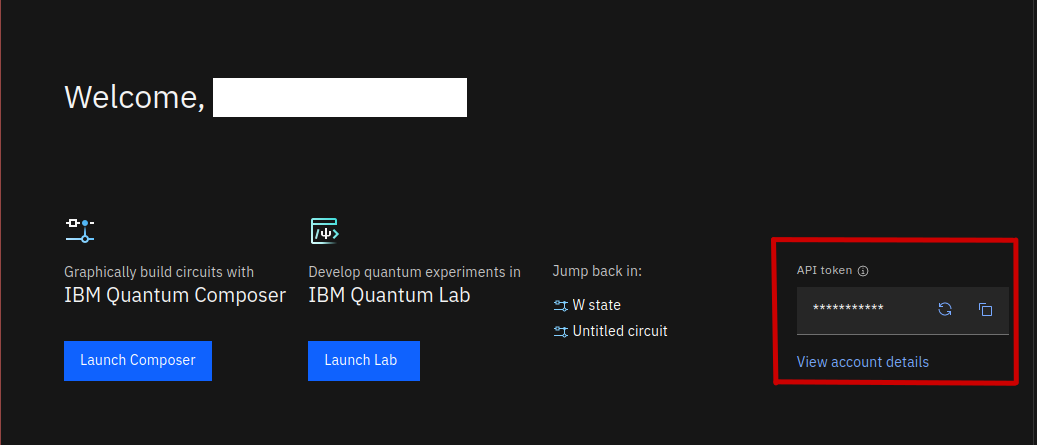

In [57]:
# Set your API Token.
#IBMQ.enable_account('Your API Token')

We begin by creating quantum and register with 2 qubits and classical register with 2 bit to create a quantum circuit. The processs is explained in the manuscript in section II, Theoretical protocol, equation (3).

In [58]:
# Create a Quantum Register with 2 qubits.
q = QuantumRegister(2, 'q')

# Create a Classical Register with 2 bits.
c = ClassicalRegister(2, 'c')

# Create a Quantum Circuit
qc = QuantumCircuit(q, c)

We now set the parameters for this simulation. 

v is the barrier potential, we have used three cases v=0, v=10 and v=50. 

dt is the step size set to be 0.1

step determines the total evolution time for the manuscript we have carried out simulation for t=0 to t=6.

You may change and see the results for different cases,
such as if height of barrier is set 0 it creates the condition free particle

In [59]:
dt = 0.1 # Step size

step = 0 # Number of trotter steps (total evolution time T=dt*step)

v = 50 # Potential barrier

We now show the circuit implementation. For details please see section IV Methods, A. Circuit construction in manuscript.

In [60]:
qc.x(q[0])
qc.barrier()

for i in range(step):
    
    # Implementation of potential energy operator
    qc.rz(2*dt*v, q[0])
    qc.barrier()

    # Inverse quantum fourier transform (IQFT)
    qc.h(q[1])
    qc.cp(pi/2, q[0], q[1])
    qc.h(q[0])
    qc.barrier()

    # Implementation of kinetic energy operator
    qc.rz(-(pi**2 *dt)/4, q[1])
    qc.rz(-(pi**2 *dt), q[0])
    qc.cp((pi**2 *dt), q[0], q[1])
    qc.barrier()

    # QFT
    qc.h(q[0])
    qc.cp(-(pi/2), q[0], q[1])
    qc.h(q[1])

job = qiskit.execute(qc, Aer.get_backend('statevector_simulator'))
psi_bell1 = job.result().get_statevector(qc)
print(psi_bell1)

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


Circuit diagram of the implemented protocol is show in this section

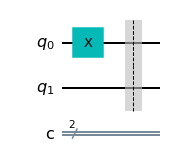

In [61]:
qc.draw(output='mpl')

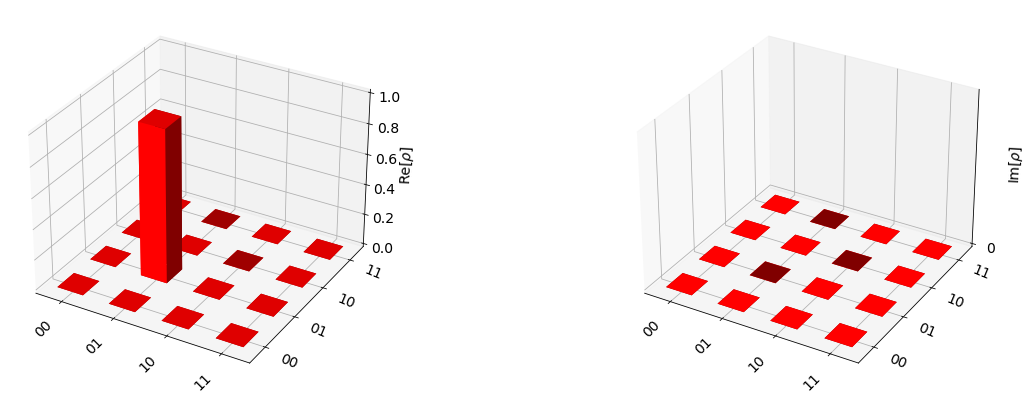

In [62]:
plot_state_city(psi_bell1, figsize=(20,7), color=['red', 'red'])

These are the tomography plots of the simulation. See section II Results, D. Experimental Procedures and Results and Figure (Tomography figure number here) in manuscript.

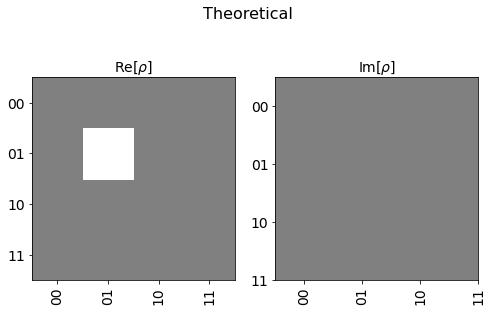

In [63]:
plot_state_hinton(psi_bell1, title='Theoretical')

In this section we carry out the measurement of qubits.

{'01': 8192}
The barriers are located at |00> and |10>


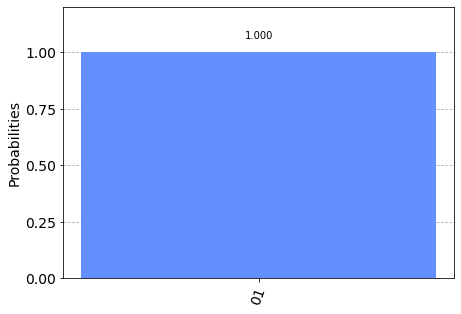

In [64]:
# Measurement
qc.barrier()
qc.measure(q[1],c[1])
qc.measure(q[0],c[0])

#Choose backend

backend = Aer.get_backend('qasm_simulator')

#backend = IBMQ.get_backend('ibmqx4')

#backend = IBMQ.get_backend('ibmqx2')

#backend = IBMQ.get_backend('ibmq_16_melbourne')

shots = 8192 # Number of shots to run the program(experiment); maximum is 8192 shots.
job_exp = execute(qc, backend=backend, shots=shots)

result = job_exp.result()
counts_exp = result.get_counts(qc)
print(result.get_counts(qc))
print('The barriers are located at |00> and |10>')
plot_histogram(counts_exp)

In [65]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

In [66]:
import numpy

print('The Numpy version used for this simulation is') 
print(numpy.__version__)

The Numpy version used for this simulation is
1.21.4
